In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import csv
import os

from scipy.signal import find_peaks

In [2]:
#Function to compute K-factors, input is theta values in radians
def getKFactor(theta):
    #Declaring constants: both M values are in amu
    M_0 = 4
    M_1 = 197
    K = M_0 * math.cos(theta)
    K = K + np.sqrt((M_1**2) - ((M_0**2) * (math.sin(theta)**2)))
    K = K / (M_0 + M_1)
    K = K**2
    print(K)

In [3]:
#Funciton to calculate the expected differential cross-section, input is theta values in raidans
def crossSection(theta, M_1, Z_1):
    M_0 = 4
    E_0 = 4
    Z_0 = 2
    cross = ((Z_0 * Z_1) / E_0)
    cross = cross**2
    cross *= 1.296
    cross2 = (1 / (math.sin(theta/2)**4))
    cross2 -= (2 * (M_0/M_1)**2)
    cross = cross * cross2
    return cross

In [18]:
#Printing K-factos
exp_theta = np.array([30,40,50,60,70,85,100,115])
exp_theta = np.radians(exp_theta)
weightedavg1 = (crossSection(np.radians(29), 197, 79) * 0.8) + (crossSection(np.radians(29), 108, 47) * 0.15) + (crossSection(np.radians(29), 64, 29) * 0.05)
weightedavg2 = (crossSection(np.radians(31), 197, 79) * 0.8) + (crossSection(np.radians(31), 108, 47) * 0.15) + (crossSection(np.radians(31), 64, 29) * 0.05)
angle_err = ((weightedavg1 + weightedavg2)/2) * (10**-3)
print("Precision due to angle: ", angle_err)

print("K-Factors:")
for i in range(len(exp_theta)):
    getKFactor(exp_theta[i])

Precision due to angle:  391.64324302052637
K-Factors:
0.9945740377085508
0.9905438375999178
0.9855976919240038
0.9798984718984659
0.973631071272633
0.9636041787127098
0.9534504123184302
0.9438573748779785


In [14]:
#Elemental Fraction cross-section calculations
#Gold
#There is a precision on the percentages of 5% which translates to the avgerage
terr = []
crossGold = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(len(exp_theta)):
    value = crossSection(exp_theta[i], 197, 79)
    crossGold[i] = value
    #print("For gold", crossGold[i])

#Silver
crossSilver = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(len(exp_theta)):
    value = crossSection(exp_theta[i], 108, 47)
    crossSilver[i] = value
#Copper
crossCopper = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range (len(exp_theta)):
    value = crossSection(exp_theta[i], 64, 29)
    crossCopper[i] = value
#Weighted average
avgCross = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(len(exp_theta)):
    total = (0.8*crossGold[i]) + (0.15*crossSilver[i]) + (0.05*crossCopper[i])
    total_err = ((crossGold[i] * 0.05 * 0.8)**2) + ((crossSilver[i] * 0.05 * 0.15)**2) + ((crossCopper[i] * 0.05 * 0.05)**2)
    total_err = np.sqrt(total_err)
    terr.append((total_err * (10**-3)))
    avgCross[i] = total * (10**-3)
    print("Theoretical Cross Section: ", avgCross[i])
    print("Error/Precision: " , terr[i])

Theoretical Cross Section:  387.4583264980811
Error/Precision:  18.065179160291173
Theoretical Cross Section:  127.05717553630843
Error/Precision:  5.9240283451953495
Theoretical Cross Section:  54.50106686593536
Error/Precision:  2.5411145037370346
Theoretical Cross Section:  27.81664597848671
Error/Precision:  1.296958795494951
Theoretical Cross Section:  16.06200493745094
Error/Precision:  0.7489010426006669
Theoretical Cross Section:  8.344267112116308
Error/Precision:  0.38906308289077074
Theoretical Cross Section:  5.047156225782973
Error/Precision:  0.23533595707275115
Theoretical Cross Section:  3.434597031724698
Error/Precision:  0.16015071204705494


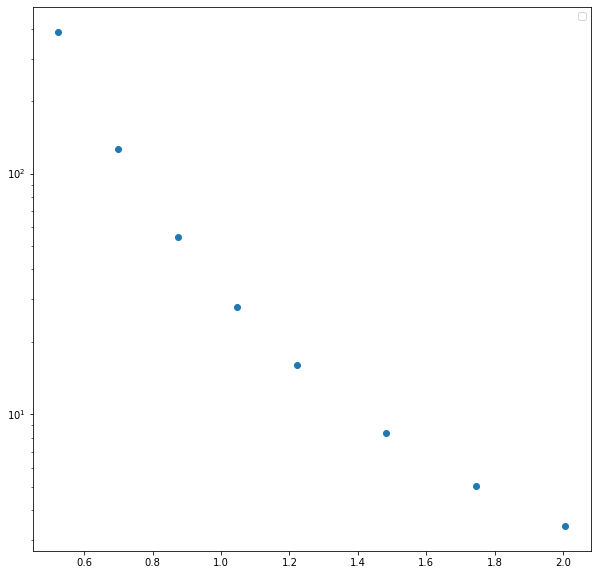

In [6]:
plt.figure(9, figsize = (10, 10))
legendList = ["Gold", "Silver", "Copper"]
plt.legend(legendList)
plt.yscale("log")
plt.scatter(exp_theta, avgCross)

##plt.scatter(exp_theta, crossGold)
##plt.scatter(exp_theta, crossSilver)
##plt.scatter(exp_theta, crossCopper)

In [7]:
#Calculating measured cross-section
# = N_s/ N_0 * del_omega * n_1
N_s = np.array([566938,166681,62757,30116,18114,13053,7590,6557]) #N_s * RT/LT
beamCurrent = np.array([182,188,173,176,178,190,204,220]) #total time
beamCurrent = beamCurrent * 0.0025 #Beam current in microcoulomb
N_0 = beamCurrent / (2*(1.6*10**(-13))) #Dividing by charge of proton
del_omega = 8.77*10**(-4)
n_1 = np.array([8*10**17,8*10**17,8*10**17,8*10**17, 8.513*10**17,1.1313*10**18,1.1313*10**18,1.6*10**18])
measuredCross = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(len(N_s)):
    measuredCross[i] = N_s[i]/(N_0[i] * del_omega * n_1[i])
    measuredCross[i] = measuredCross[i] * 10**24
    print(measuredCross[i], "In b/sr")

568.3090455724436 In b/sr
161.75161939882096 In b/sr
66.18147784420088 In b/sr
31.217995231678245 In b/sr
17.447053949428195 In b/sr
8.863175037728666 In b/sr
4.800032718009575 In b/sr
2.718772675443143 In b/sr
20.84158198675495


Percent error is:  46.67617307619227
Percent error is:  27.306166468810012
Percent error is:  21.43152721578392
Percent error is:  12.227747571803315
Percent error is:  8.623139000211664
Percent error is:  6.2187357935711045
Percent error is:  4.896292025021697
Percent error is:  20.84158198675495


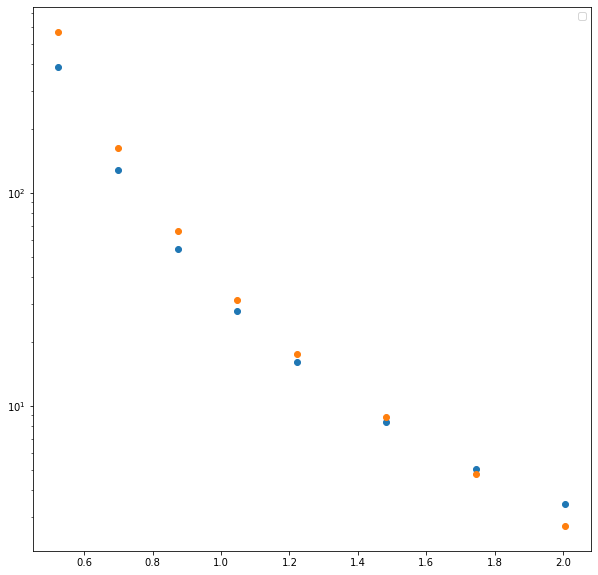

In [15]:
#Calculating Percent error and plotting both graphs
#Precision of sqrt(N_s) which ius statistical precision.
#precision on the del_omega from r, and error on the target denisty of 8*10^17
err = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0, 0.0])
for i in range(len(exp_theta)):
    err[i] = abs((avgCross[i] - measuredCross[i])/avgCross[i]) * 100
    print("Percent error is: ", err[i])
plt.figure(9, figsize = (10, 10))
legendList = ["Theoretical", "Experimental"]
plt.legend(legendList)
plt.yscale("log")
plt.scatter(exp_theta, avgCross)
plt.scatter(exp_theta, measuredCross)